In [4]:
import numpy as np
from sklearn.datasets import fetch_openml

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [5]:
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=
                               True)
X, y = X_mnist, y_mnist.astype(float)

In [6]:
X.shape

(70000, 784)

In [7]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


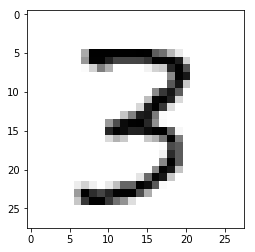

In [12]:
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
#     plt.axis("off")
    plt.show()
plot_digit(X[36005])

In [11]:
y[36005]

3.0

In [13]:
X_train = X[np.any([y == 1,y == 2], axis = 0)]
y_train = y[np.any([y == 1,y == 2], axis = 0)]

In [14]:
print(X_train.shape)
print(y_train.shape)

(14867, 784)
(14867,)


In [15]:
X_train_normalised = X_train/255.0

In [16]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)

n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]


print(n_dim)
print("The training dataset has", dim_train, "observations (m).")

(784, 14867)
(1, 14867)
784
The training dataset has 14867 observations (m).


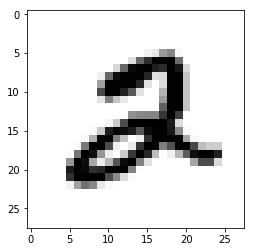

In [20]:
plot_digit(X_train_tr[:,1])

In [21]:
y_train_shifted = y_train_tr - 1

In [26]:
Xtrain = X_train_tr
ytrain = y_train_shifted

In [28]:
import tensorflow as tf

In [30]:


tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

#W = tf.Variable(tf.random_normal([1, n_dim]))/10.0
W = tf.Variable(tf.zeros([1, n_dim]))
#b = tf.Variable(tf.random_normal([1]))/10.0
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()



Instructions for updating:
Colocations handled automatically by placer.


In [31]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [35]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 10 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [36]:
sess = tf.Session()
sess.run(init)
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
print(sess.run(cost, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
sess.close()

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]]
0.69315207


In [46]:
sess, cost_history1 = run_logistic_model(learning_r = 0.1, 
                                training_epochs = 150, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.562725
Reached epoch 10 cost J = 0.231419
Reached epoch 20 cost J = 0.166200
Reached epoch 30 cost J = 0.136302
Reached epoch 40 cost J = 0.118561
Reached epoch 50 cost J = 0.106610
Reached epoch 60 cost J = 0.097922
Reached epoch 70 cost J = 0.091272
Reached epoch 80 cost J = 0.085991
Reached epoch 90 cost J = 0.081677
Reached epoch 100 cost J = 0.078074
Reached epoch 110 cost J = 0.075012
Reached epoch 120 cost J = 0.072370
Reached epoch 130 cost J = 0.070062
Reached epoch 140 cost J = 0.068026
Reached epoch 150 cost J = 0.066211


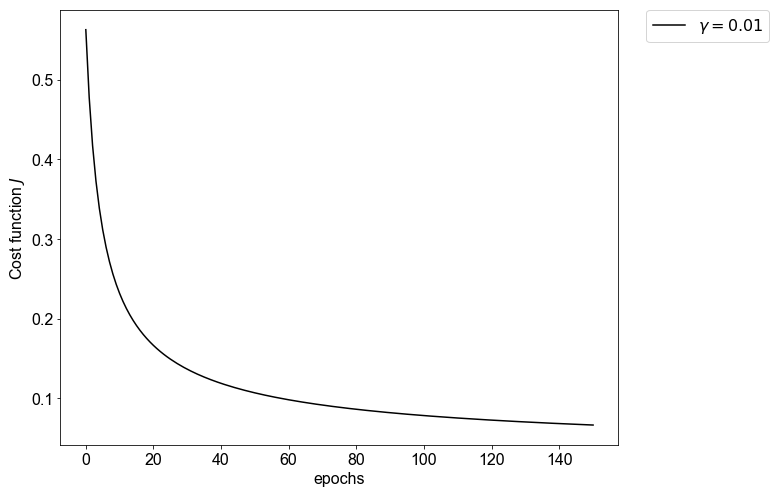

In [47]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history1, ls='solid', color = 'black', label = '$\gamma = 0.01$')
# ax.plot(cost_history2, ls='solid', color = 'red', label = '$\gamma = 0.05$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

In [48]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))

accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.9855384
